## Check the data

In [16]:
from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [18]:
print(type(twenty_train))
print(twenty_train.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])


In [19]:
twenty_train.filenames

array(['C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U99')

In [29]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [23]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
len(twenty_train.target_names)

20

In [28]:
# `twenty_train.target` only contains 0 and 1
import numpy as np
np.unique(twenty_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [40]:
print(twenty_train.description)
print(twenty_train.target[1])
print(twenty_train.data[1])

the 20 newsgroups by date dataset
4
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [35]:
# The first document belongs to the category 'comp.sys.mac.hardware'
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


In [39]:
print(len(twenty_train.data))
print(len(twenty_train.target))

11314
11314


## Question 1:
To get started, plot a histogram of the number of training documents for each
of the 20 categories to check if they are evenly distributed.

In [42]:
len(twenty_train.target==1)

11314

In [46]:
num = [0]*20
lenth = len(twenty_train.target)
for i in range(0,lenth):
    num[twenty_train.target[i]]+=1
print(num)

[480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591, 594, 593, 599, 546, 564, 465, 377]


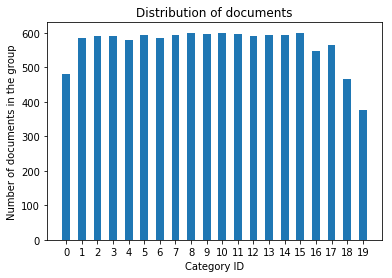

In [73]:
from matplotlib import pyplot as plt
t = range(0,20)
plt.bar(t,num,0.5)
plt.xticks(t,t)
plt.title("Distribution of documents")
plt.xlabel("Category ID")
plt.ylabel("Number of documents in the group")
plt.show()

## Question 2: 
Use the following specs to extract features from the textual data:
- Use the “english” stopwords of the CountVectorizer
- Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.) 
- Perform lemmatization with nltk.stem.wordnet.WordNetLemmatizer and pos_tag 
- Use min_df=3 

Report the shape of the TF-IDF matrices of the train and test subsets respectively

In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

In [56]:
import numpy as np
print(np.unique(train_dataset.target))
print(train_dataset.target_names)
print(len(train_dataset.target))
print(len(test_dataset.target))
print(type(train_dataset.target))

[0 1 2 3 4 5 6 7]
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
4732
3150
<class 'numpy.ndarray'>


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3,token_pattern=r'(?u)\b[a-zA-Z]{2,}\b',stop_words='english') 
# ngram is n words together to be concidered as a phrase
# max_df = 1.0 means if the context only consists of the same word, then it will be eliminated.
# min_df = 3 (int) means if the context contains the word repeats less than 3 times, then it will be ignored.
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b[a-zA-Z]{2,}\\b',
        tokenizer=None, vocabulary=None)

In [4]:
 X_train = vectorizer.fit_transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vectorizer.get_feature_names()))
print('-' * 20)
print(vectorizer.get_feature_names()) # not lemmatized

(4732, 16317)
--------------------
16317
--------------------
['aa', 'aaa', 'aamir', 'aardvark', 'aargh', 'aarghhhh', 'aarhus', 'aaron', 'aau', 'ab', 'abad', 'abandon', 'abate', 'abbot', 'abbott', 'abbreviation', 'abc', 'abd', 'abel', 'aber', 'aberystwyth', 'abiding', 'abilities', 'ability', 'able', 'abo', 'abominations', 'abort', 'abott', 'abs', 'absence', 'absent', 'absolute', 'absolutely', 'abstact', 'abstract', 'abstracts', 'absurd', 'absurdity', 'absurdum', 'abuse', 'abused', 'ac', 'acad', 'academic', 'academy', 'acadiau', 'acbl', 'acc', 'accel', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accelerator', 'accelerators', 'accelleration', 'accellerator', 'accented', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepts', 'access', 'accessed', 'accesses', 'accessible', 'accessing', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclimated', 'accommodate', 'accomodate', 'accompanied', 'accomplish', 'accomplished', 'accomplishm

In [5]:
# Lemmatization
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

wnl = WordNetLemmatizer()
X_train = vectorizer.fit_transform(train_dataset.data)

# why 'ran' is considered to be NOUN in pos_tag?

# Here 2nd para of lemmatize doesn't support pos_tag. it should be transfered to wordnet.NOUN or ... to fit in

# Define a tag_trans to fit in pos in wnl.lemmatize(_,pos=_)

#The function is from Author: 
#Author：但盼风雨来_jc
#Link：https://www.jianshu.com/p/79255fe0c5b5
#Resource：简书
#简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。

def tag_trans(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return 'n'

org_wordlist = vectorizer.get_feature_names()
#org_wordlist = ['I','loves','bunnies','her','she','running','ran']*3  #testset
new_wordlist = []
for word in org_wordlist:
    tag = pos_tag(word_tokenize(word))[0][1]
    pos = tag_trans(tag)
    new_word = wnl.lemmatize(word,pos)
    new_wordlist.append(new_word)

#a=tag_trans(pos_tag(word_tokenize('aaa'))[0][1])
#print(a)
#print(wnl.lemmatize('aaa',pos=a))
    
print(len(new_wordlist))
#print(new_wordlist)
print('-' * 20)

vec = CountVectorizer() # new vectorizer 
print(vec)
print('-' * 20)
base = vec.fit_transform(new_wordlist)
X_train = vec.transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vec.get_feature_names()))
print('-' * 20)
print(vec.get_feature_names())

16317
--------------------
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
--------------------
(4732, 13481)
--------------------
13481
--------------------
['aa', 'aaa', 'aamir', 'aardvark', 'aargh', 'aarghhhh', 'aarhus', 'aaron', 'aau', 'ab', 'abad', 'abandon', 'abate', 'abbot', 'abbott', 'abbreviation', 'abc', 'abd', 'abel', 'aber', 'aberystwyth', 'abide', 'ability', 'able', 'abo', 'abomination', 'abort', 'abott', 'absence', 'absent', 'absolute', 'absolutely', 'abstact', 'abstract', 'absurd', 'absurdity', 'absurdum', 'abuse', 'ac', 'acad', 'academic', 'academy', 'acadiau', 'acbl', 'acc', 'accel', 'accelerate', 'acceleration', 'accelerator', 'accelleration', 'ac

In [6]:
# test data
X_test = vec.transform(test_dataset.data)
print(X_test.shape)
print(X_test)

(3150, 13481)
  (0, 294)	1
  (0, 604)	1
  (0, 751)	3
  (0, 915)	4
  (0, 1965)	3
  (0, 2153)	4
  (0, 2880)	3
  (0, 2919)	1
  (0, 2920)	1
  (0, 3340)	1
  (0, 3443)	1
  (0, 3965)	1
  (0, 5104)	1
  (0, 5209)	1
  (0, 5402)	1
  (0, 5676)	2
  (0, 5757)	3
  (0, 6210)	3
  (0, 7041)	1
  (0, 8026)	1
  (0, 8203)	1
  (0, 8536)	1
  (0, 8551)	1
  (0, 8761)	1
  (0, 9013)	1
  :	:
  (3149, 5402)	1
  (3149, 5751)	1
  (3149, 5910)	1
  (3149, 6262)	1
  (3149, 6337)	1
  (3149, 6365)	1
  (3149, 6450)	1
  (3149, 6797)	1
  (3149, 6946)	1
  (3149, 7041)	1
  (3149, 7495)	1
  (3149, 7712)	5
  (3149, 8203)	1
  (3149, 8465)	1
  (3149, 8536)	1
  (3149, 8551)	1
  (3149, 9207)	1
  (3149, 10006)	2
  (3149, 10047)	1
  (3149, 11389)	1
  (3149, 11520)	1
  (3149, 11787)	1
  (3149, 12383)	1
  (3149, 12475)	1
  (3149, 12498)	2


In [7]:
# TF-IDF matrices of the train subsets
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

print(tfidf)
print('-' * 20)

X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train.toarray()[:30,:30])
print('-' * 20)
print(X_train_tfidf.toarray()[:30,:30])

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
--------------------
(4732, 13481)
--------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
# TF-IDF matrices of the test subsets
X_test_tfidf = tfidf.transform(X_test)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test.toarray()[:30,:30])
print('-' * 20)
print(X_test_tfidf.toarray()[:30,:30])

(3150, 13481)
--------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

## Question 3:
Reduce the dimensionality of the data using the methods above
- Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each document is mapped to a 50-dimensional vector.
- Also reduce dimnsionality through NMF (k = 50) and compare with LSI: 
<br>Which one is larger, the $ \mid\mid X-WH\mid\mid_F^2 $ in NMF or the $\mid\mid X-U_k\sum_kV_k^T\mid\mid_F^2$ in LSI? Why is the case?

In [14]:
# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 50, random_state = 0)
X_train_lsi = svd.fit_transform(X_train_tfidf)
X_test_lsi = svd.transform(X_test_tfidf)

# show time
print(X_train_lsi.shape)
print(X_train_lsi)

(4732, 50)
[[ 0.13166112  0.00335123 -0.02195652 ... -0.02213765  0.035859
  -0.00116284]
 [ 0.17056195  0.05670839 -0.00256551 ...  0.03959442 -0.02626286
  -0.01964574]
 [ 0.10949843 -0.01231561  0.06019437 ... -0.00197308 -0.01675831
  -0.0034273 ]
 ...
 [ 0.19723862  0.13801917 -0.00869225 ...  0.0155698  -0.00703703
   0.02047146]
 [ 0.12222647 -0.10008228  0.01775329 ... -0.05975422  0.00747294
   0.02738025]
 [ 0.18338687  0.10951299 -0.02522662 ...  0.00525198 -0.01247589
  -0.00569698]]


In [39]:
# NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random',random_state=0)
W_train = nmf.fit_transform(X_train_tfidf)
W_test = nmf.transform(X_test_tfidf)

H = nmf.components_

# show time
print(W_train.shape)
print('-' * 20, 'NMF', '-'*20)
print(W_train)
print('-' * 20, 'NMF', '-'*20)
print(H.shape)

(4732, 50)
-------------------- NMF --------------------
[[0.01959722 0.09155417 0.         ... 0.         0.         0.00032074]
 [0.03200949 0.12364548 0.         ... 0.         0.         0.        ]
 [0.00089783 0.00445255 0.00036187 ... 0.         0.         0.        ]
 ...
 [0.02558241 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.01372043 0.        ]
 [0.01477539 0.05642948 0.         ... 0.00258744 0.         0.08569182]]
-------------------- NMF --------------------
(50, 13481)


In [24]:
# Loss of nmf

import numpy as np

err_nmf = nmf.reconstruction_err_
err = np.sum(np.array(X_train_tfidf-W_train.dot(H))**2)
err = err**0.5

print(err_nmf)
print(err)

64.19541182867786
64.19541182867785


In [40]:
# Check attributes of the svd function

check = svd.components_.dot(np.transpose(svd.components_))
print(svd.components_.shape)
print(check)

err_lsi_test = np.sum(np.array(X_test_tfidf-X_test_lsi.dot(svd.components_))**2)
err_lsi_test = err_lsi_test**0.5

print(err_lsi_test)

(50, 13481)
[[ 1.00000000e+00 -1.21430643e-16  2.63677968e-16 ...  0.00000000e+00
  -6.93889390e-18 -1.04083409e-17]
 [-1.21430643e-16  1.00000000e+00  3.81639165e-17 ...  3.04660810e-17
   1.73472348e-17 -3.29597460e-17]
 [ 2.63677968e-16  3.81639165e-17  1.00000000e+00 ...  3.98986399e-17
   1.59594560e-16  6.93889390e-18]
 ...
 [ 0.00000000e+00  3.04660810e-17  3.98986399e-17 ...  1.00000000e+00
  -4.85722573e-17  1.90819582e-17]
 [-6.93889390e-18  1.73472348e-17  1.59594560e-16 ... -4.85722573e-17
   1.00000000e+00  2.15105711e-16]
 [-1.04083409e-17 -3.29597460e-17  6.93889390e-18 ...  1.90819582e-17
   2.15105711e-16  1.00000000e+00]]
53.05692651445144


In [41]:
# Loss of lsi

err_lsi = np.sum(np.array(X_train_tfidf-X_train_lsi.dot(svd.components_))**2)
err_lsi = err_lsi**0.5
print('The loss of LSI method is: ',err_lsi)
print('The loss of NMF method is: ',err_nmf)

if err_lsi > err_nmf:
    print('So the loss of LSI is larger!')
elif err_lsi < err_nmf:
    print('So the loss of NMF is larger!')
else:
    print('Incredible!!! They are equal!')

The loss of LSI method is:  63.93259012031856
The loss of NMF method is:  64.19541182867786
So the loss of NMF is larger!


## Question 4:
Hard margin and soft margin linear SVMs:
- Train two linear SVMs and compare:
    * Train one SVM with $\gamma = 1000$ (hard margin), another with $\gamma = 0.0001$ (soft nargin).
    * Plot the ROC curve, report the **confusion matrix** and calculate the **accuracy, recall, precision** and **F-1 score** of both SVM classifier. Which one performs better?
    * What happens for the soft margin SVM? Why is the case?
        - Does the DOC curve of the soft margin SVM look good? Does this conflict with other metrics?
- Use cross-validation to choose $\gamma$ (use average validation accuuracy to compare):
<br>Using a 5-fold cross-validation, find the best value of the parameter $\gamma$ in the range $\lbrace10^k\mid-3\leq k\leq3, k\in\mathbb Z\rbrace$. Again, plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall precision** and **F-1 score** of this best SVM.

### Train SVMs and compare

In [77]:
# data preparation and regroup

# number and class name into dict
#num = np.unique(train_dataset.target)
#name = train_dataset.target_names
#name_dic = dict(zip(name,num))
#print(name_dic)

# divide into groups
#grp1 = (name_dic.get('comp.graphics'), name_dic.get('rec.autos'))
#grp2 = (name_dic.get('comp.os.ms-windows.misc'), name_dic.get('rec.motorcycles'))
#grp3 = (name_dic.get('comp.sys.ibm.pc.hardware'), name_dic.get('rec.sport.baseball'))
#grp4 = (name_dic.get('comp.sys.mac.hardware'), name_dic.get('rec.sport.hockey'))

# regroup
train_label = []
new_name = ['Computer Technology','Recreational Activity']
test_label = []
docs = len(X_train_lsi)

for label in train_dataset.target:
    name = train_dataset.target_names[label]
    if name.startswith('comp'):
        train_label.append(0)
    elif name.startswith('rec'):
        train_label.append(1)
    else:
        print('Wrong type!')
        
for label in test_dataset.target:
    name = test_dataset.target_names[label]
    if name.startswith('comp'):
        test_label.append(0)
    elif name.startswith('rec'):
        test_label.append(1)
    else:
        print('Wrong type!')
        
# check
print('-'*20,'train_dataset','-'*20)
print(len(train_label))
print(np.unique(train_label))
print('-'*20,'test_dataset','-'*20)
print(len(test_label))
print(np.unique(test_label))

-------------------- train_dataset --------------------
4732
[0 1]
-------------------- test_dataset --------------------
3150
[0 1]


In [214]:
# train linear SVMs
from sklearn.svm import LinearSVC

svm_hard = LinearSVC(loss='hinge', C=1000).fit(X_train_lsi,train_label)
svm_soft = LinearSVC(loss='hinge', C=0.0001).fit(X_train_lsi,train_label)

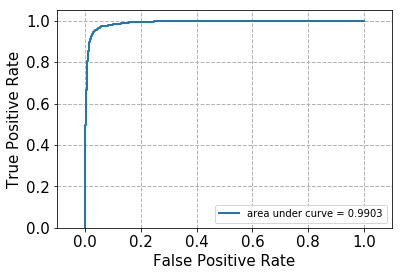

In [101]:
# define plot drawing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
# prepare plot for svm_hard

score_hard = svm_hard.decision_function(X_test_lsi)
#print(len(score_hard))
fpr_hard,tpr_hard,_ = metrics.roc_curve(test_label, score_hard, pos_label=1)

# draw the ROC for svm_hard

plot_roc(fpr_hard, tpr_hard)

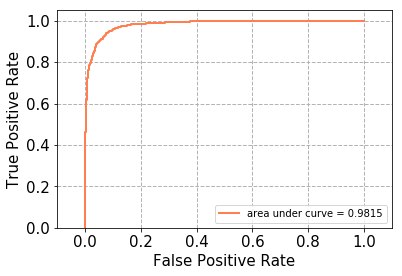

In [100]:
# prepare plot for svm_soft

score_soft = svm_soft.decision_function(X_test_lsi)
fpr_soft, tpr_soft, _ = metrics.roc_curve(test_label, score_soft, pos_label=1)

# draw the ROC for svm_soft

plot_roc(fpr_soft, tpr_soft)

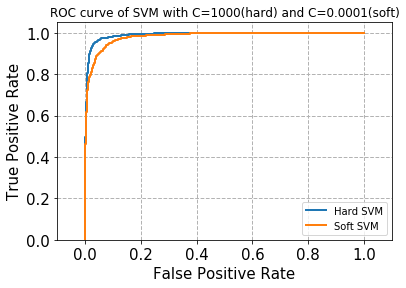

In [105]:
fig, ax = plt.subplots()

line_hard = ax.plot(fpr_hard, tpr_hard, linewidth=2)
line_soft = ax.plot(fpr_soft, tpr_soft, linewidth=2)

ax.grid(color='0.7', linestyle='--', linewidth=1)

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)

ax.legend(('Hard SVM','Soft SVM'),loc="lower right")
plt.title('ROC curve of SVM with C=1000(hard) and C=0.0001(soft)')

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

In [288]:
# Confusion Matrix & other parameters
def evaluate(classifier, clf_name, testSet, label):
    y_pred = classifier.predict(testSet)
    CM = metrics.confusion_matrix(label,y_pred)
    
    print('-'*20, 'Confusion Matrix of',clf_name,'-'*20)
    print(CM)
    
    accuracy = metrics.accuracy_score(label, y_pred)
    recall = metrics.recall_score(label, y_pred)
    precision = metrics.precision_score(label, y_pred)
    Fscore = metrics.f1_score(label, y_pred)
    
    print('-'*20, 'Other Evaluation of',clf_name,'-'*20)
    print('Accuracy:',accuracy)
    print('Recall:',recall)
    print('Precision:',precision)
    print('F-1 Score:',Fscore)

    return CM,accuracy,recall,precision,Fscore

CM_hard,accurarcy_hard,recall_hard,precision_hard,Fscore_hard = evaluate(
    svm_hard,'hard SVM(C=1000)',X_test_lsi,test_label)
print()
evaluate(svm_soft,'soft SVM(C=0.0001)',X_test_lsi,test_label)

print()
print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of hard SVM(C=1000) --------------------
[[1493   67]
 [  68 1522]]
-------------------- Other Evaluation of hard SVM(C=1000) --------------------
Accuracy: 0.9571428571428572
Recall: 0.9572327044025157
Precision: 0.9578351164254248
F-1 Score: 0.9575338156653036

-------------------- Confusion Matrix of soft SVM(C=0.0001) --------------------
[[  17 1543]
 [   0 1590]]
-------------------- Other Evaluation of soft SVM(C=0.0001) --------------------
Accuracy: 0.5101587301587301
Recall: 1.0
Precision: 0.5075007979572295
F-1 Score: 0.6733008680923142

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


### Use cross-validation to choose $\gamma$

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def cross_validate(classifier, train, label):
    avg_score = []

    for para in range(-3,4):
        classifier.set_params(C=10**para).fit(train,label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
        scores = cross_val_score(classifier,train,label,cv=cv,scoring='f1_macro')
    
        print('-'*20,'C =',10**para,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,4)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =',10**c_idx)
    print('Average F-1 Score is:',max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm = cross_validate(LinearSVC(loss='hinge'),X_train_lsi,train_label)

D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metr

-------------------- C = 0.001 --------------------
[0.3330202  0.32955619 0.33395872 0.76019494 0.34141073]
0.4196281566801231
-------------------- C = 0.01 --------------------
[0.3330202  0.32955619 0.33552588 0.76019494 0.34141073]
0.41994158703893525
-------------------- C = 0.1 --------------------
[0.95774438 0.95351965 0.95422533 0.95069239 0.94922769]
0.9530818885844647
-------------------- C = 1 --------------------
[0.96126205 0.95985675 0.96197153 0.96054577 0.96047274]
0.9608217671167585
-------------------- C = 10 --------------------
[0.96690008 0.96760152 0.96267604 0.96477692 0.96682307]
0.9657555268223899
-------------------- C = 100 --------------------
[0.96971757 0.96900665 0.96408306 0.96900203 0.9668137 ]
0.9677246036422045
-------------------- C = 1000 --------------------
[0.96195251 0.96760403 0.9612556  0.961967   0.96684022]
0.9639238703152009
-------------------- Result --------------------
The best classifier is when C = 100
Average F-1 Score is: 0.9677246

**$\therefore$ the best $\gamma$ is 100**

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


Text(0.5,1,'ROC Curve of the best SVM')

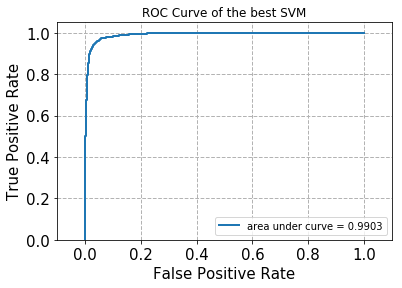

In [198]:
# ROC curve of the best

print(svm)

score = svm.decision_function(X_test_lsi)
fpr, tpr, _ = metrics.roc_curve(test_label, score, pos_label=1)

plot_roc(fpr, tpr)
plt.title('ROC Curve of the best SVM')

In [289]:
# Confusion Matrix of the best SVM and other parameters
CM,accuracy,recall,precision,Fscore = evaluate(
    svm,'best SVM(C=100)',X_test_lsi,test_label)

-------------------- Confusion Matrix of best SVM(C=100) --------------------
[[1478   82]
 [  50 1540]]
-------------------- Other Evaluation of best SVM(C=100) --------------------
Accuracy: 0.9580952380952381
Recall: 0.9685534591194969
Precision: 0.9494451294697904
F-1 Score: 0.9589041095890412


In [290]:
# compare with hard svm 

print('-'*20, 'Other Evaluation of Best SVM(C=100)','-'*20)
print('Accuracy:',accuracy)
print('Recall:',recall)
print('Precision:',precision)
print('F-1 Score:',Fscore)

print('-'*20, 'Other Evaluation of Hard SVM(C=1000)','-'*20)
print('Accuracy:',accuracy_hard)
print('Recall:',recall_hard)
print('Precision:',precision_hard)
print('F-1 Score:',Fscore_hard)

-------------------- Other Evaluation of Best SVM(C=100) --------------------
Accuracy: 0.9580952380952381
Recall: 0.9685534591194969
Precision: 0.9494451294697904
F-1 Score: 0.9589041095890412
-------------------- Other Evaluation of Hard SVM(C=1000) --------------------
Accuracy: 0.9571428571428572
Recall: 0.9572327044025157
Precision: 0.9578351164254248
F-1 Score: 0.9575338156653036


## Question 5:
Logistic classifier:
- Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear_model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall precision** and **F-1 score** of this classifier.
- Regularization:
    * Using 5-fold cross-validation on the dimension-reduced-by-svd training data, find the best regularization strength in the range $\lbrace10^k\mid -3 \leq k \leq 3, k \in \mathbb Z\rbrace$ for logistic regression with L1 regularization and logistic regression L2 regularization, respectively.
    * Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/L1 regularization and w/L2 regularization (with the best parameters you found from the part above), using test data.
    * How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?
    * Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what's the difference between their ways to find this boundary?
    <br>Why their performance differ?

### Train a logistic classifier without regularization

In [291]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',solver='saga',
                          tol=1e-6, max_iter=int(1e6),
                          warm_start=True,random_state=0,C=float(10**6))
clf_nonReg = clf.fit(X_train_lsi, train_label)

Text(0.5,1,'ROC Curve of Logistic Regression without Regularization')

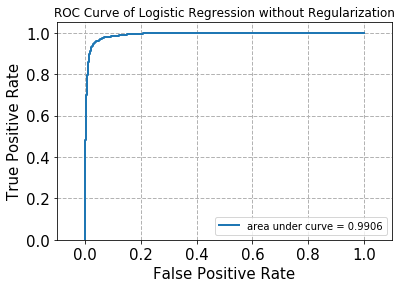

In [292]:
# plot ROC curve
score_nonReg = clf_nonReg.decision_function(X_test_lsi)
fpr_nonReg, tpr_nonReg, _ = metrics.roc_curve(test_label, score_nonReg, pos_label=1)

plot_roc(fpr_nonReg, tpr_nonReg)
plt.title('ROC Curve of Logistic Regression without Regularization')

In [294]:
# Confusion Matrix of the best SVM
evaluate(clf_nonReg,'Logistic Regression without Regularization (train)',
        X_train_lsi,train_label)
evaluate(clf_nonReg,'Logistic Regression without Regularization (test)',
        X_test_lsi,test_label)

print()
print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of Logistic Regression without Regularization (train) --------------------
[[2276   67]
 [  62 2327]]
-------------------- Other Evaluation of Logistic Regression without Regularization (train) --------------------
Accuracy: 0.9727387996618766
Recall: 0.9740477187107577
Precision: 0.9720133667502089
F-1 Score: 0.9730294794062304
-------------------- Confusion Matrix of Logistic Regression without Regularization (test) --------------------
[[1478   82]
 [  54 1536]]
-------------------- Other Evaluation of Logistic Regression without Regularization (test) --------------------
Accuracy: 0.9568253968253968
Recall: 0.9660377358490566
Precision: 0.9493201483312732
F-1 Score: 0.9576059850374065

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


### Logistic Regression with Regularization

#### Using 5-fold cross-validation to optimize the regularization strength

In [225]:
# L1 regularization
clf_L1 = cross_validate(LogisticRegression(penalty='l1',solver='saga',
                          tol=1e-6, max_iter=int(1e6),
                          warm_start=True,random_state=0),
                        X_train_lsi,train_label)

D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metr

-------------------- C = 0.001 --------------------
[0.3330202  0.32955619 0.33395872 0.32733302 0.32089909]
0.32895344308594004


D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metr

-------------------- C = 0.01 --------------------
[0.3330202  0.32955619 0.33270677 0.32733302 0.34532042]
0.33358731819182214
-------------------- C = 0.1 --------------------
[0.94365482 0.93872993 0.93591292 0.94222418 0.93576382]
0.9392571345788452
-------------------- C = 1 --------------------
[0.96549212 0.95985197 0.95633768 0.95843337 0.95836346]
0.9596957196159284
-------------------- C = 10 --------------------
[0.96619477 0.96971289 0.96478622 0.96899631 0.96752214]
0.9674424640052827
-------------------- C = 100 --------------------
[0.96478531 0.96971289 0.96337912 0.97251655 0.96611005]
0.967300784588406
-------------------- C = 1000 --------------------
[0.96478531 0.97041667 0.96197062 0.97181287 0.96611005]
0.9670191048115347
-------------------- Result --------------------
The best classifier is when C = 10
Average F-1 Score is: 0.9674424640052827


#### $\therefore$ The best inverse of regularization strength for L1 is 10

In [226]:
# L2 regularization
clf_L2 = cross_validate(LogisticRegression(penalty='l2',solver='saga',
                          tol=1e-6, max_iter=int(1e6),
                          warm_start=True,random_state=0),
                        X_train_lsi,train_label)

D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Installation\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------- C = 0.001 --------------------
[0.3330202  0.32955619 0.33395872 0.79496787 0.32534951]
0.4233704976975793
-------------------- C = 0.01 --------------------
[0.88316838 0.8202951  0.90632796 0.94361723 0.92321564]
0.8953248612511322
-------------------- C = 0.1 --------------------
[0.95633378 0.95352113 0.95140727 0.9485803  0.94924251]
0.9518169987544933
-------------------- C = 1 --------------------
[0.9591529  0.95915096 0.9577464  0.95632105 0.95484349]
0.9574429591300128
-------------------- C = 10 --------------------
[0.96478622 0.96619289 0.96197115 0.96195908 0.9639995 ]
0.9637817686506833
-------------------- C = 100 --------------------
[0.96619477 0.97041778 0.96267589 0.96759117 0.9689386 ]
0.967163642402055
-------------------- C = 1000 --------------------
[0.96478426 0.97041778 0.96408306 0.97110921 0.96682307]
0.9674434779103833
-------------------- Result --------------------
The best classifier is when C = 1000
Average F-1 Score is: 0.96744347

#### $\therefore$ The best inverse of regularization strength for L2 is 1000

In [298]:
print(clf_nonReg)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000000,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='saga', tol=1e-06, verbose=0, warm_start=True)


In [296]:
clf_L1

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000000, multi_class='ovr',
          n_jobs=1, penalty='l1', random_state=0, solver='saga', tol=1e-06,
          verbose=0, warm_start=True)

In [297]:
clf_L2

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=0, solver='saga', tol=1e-06,
          verbose=0, warm_start=True)

#### Compare 3 classifiers

In [247]:
# For test data, compare their performance

y_pred_L1 = clf_L1.predict(X_test_lsi)
y_pred_L2 = clf_L2.predict(X_test_lsi)

accuracy_L1 = metrics.accuracy_score(test_label, y_pred_L1)
accuracy_L2 = metrics.accuracy_score(test_label, y_pred_L2)

recall_L1 = metrics.recall_score(test_label, y_pred_L1)
recall_L2 = metrics.recall_score(test_label, y_pred_L2)

precision_L1 = metrics.precision_score(test_label, y_pred_L1)
precision_L2 = metrics.precision_score(test_label, y_pred_L2)

Fscore_L1 = metrics.f1_score(test_label, y_pred_L1)
Fscore_L2 = metrics.f1_score(test_label, y_pred_L2)

# show time

print('-'*20, 'Logistic Regression with w/o regularization','-'*20)
print('Accuracy:',accuracy_nonReg)
print('Recall:',recall_nonReg)
print('Precision:',precision_nonReg)
print('F-1 Score:',Fscore_nonReg)

print('-'*20, 'Logistic Regression with w/L1 regularization','-'*20)
print('Accuracy:',accuracy_L1)
print('Recall:',recall_L1)
print('Precision:',precision_L1)
print('F-1 Score:',Fscore_L1)

print('-'*20, 'Logistic Regression with w/L2 regularization','-'*20)
print('Accuracy:',accuracy_L2)
print('Recall:',recall_L2)
print('Precision:',precision_L2)
print('F-1 Score:',Fscore_L2)

-------------------- Logistic Regression with w/o regularization --------------------
Accuracy: 0.9568253968253968
Recall: 0.9660377358490566
Precision: 0.9493201483312732
F-1 Score: 0.9576059850374065
-------------------- Logistic Regression with w/L1 regularization --------------------
Accuracy: 0.9561904761904761
Recall: 0.9666666666666667
Precision: 0.9475955610357584
F-1 Score: 0.9570361145703612
-------------------- Logistic Regression with w/L2 regularization --------------------
Accuracy: 0.9568253968253968
Recall: 0.9666666666666667
Precision: 0.9487654320987654
F-1 Score: 0.957632398753894


In [248]:
# Confusion Matrix 
CM_L1 = metrics.confusion_matrix(test_label, y_pred_L1)
CM_L2 = metrics.confusion_matrix(test_label, y_pred_L2)

# show time
print('-'*20, 'Confusion Matrix of w/o regularization','-'*20)
print(CM_nonReg)
print('-'*20, 'Confusion Matrix of w/L1 regularization','-'*20)
print(CM_L1)
print('-'*20, 'Confusion Matrix of w/L2 regularization','-'*20)
print(CM_L2)
print('-'*20, 'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of w/o regularization --------------------
[[1478   82]
 [  54 1536]]
-------------------- Confusion Matrix of w/L1 regularization --------------------
[[1475   85]
 [  53 1537]]
-------------------- Confusion Matrix of w/L2 regularization --------------------
[[1477   83]
 [  53 1537]]
-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


In [253]:
# Learnt coefficients
print('-'*20, 'Coefficients of w/o regularization','-'*20)
print(clf_nonReg.coef_)
print('-'*20, 'Coefficients of w/L1 regularization','-'*20)
print(clf_L1.coef_)
print('-'*20, 'Coefficients of w/L2 regularization','-'*20)
print(clf_L2.coef_)

-------------------- Coefficients of w/o regularization --------------------
[[-1.35258799e+01 -1.34311292e+02  3.19640271e+01 -2.41229453e+01
   7.47279950e+01 -5.48547628e-02  3.27404951e+01  3.09942971e+00
  -7.91834354e+00  9.88295307e-01  1.13905853e+01 -1.58964773e+01
  -3.57281611e+00 -5.36968055e+00  1.36672346e+01 -5.22515012e+00
   2.59906399e+00  2.20090806e+01 -4.74922377e+00 -7.22015896e+00
  -1.27752475e+01 -2.31527772e+01  9.31929229e+00 -3.93973769e+00
   1.89412721e+00 -4.24151496e+00  1.70783191e+01  5.07081260e+00
  -1.80745682e+01 -5.99363532e+00  2.63310381e+01 -2.15088193e+01
   2.07653587e+00  3.68184528e+00 -1.83705628e+00  3.85287132e-01
   5.56535439e+00  8.97712267e+00 -8.73202328e+00  4.94363754e+00
  -1.33551705e+01 -8.07479823e+00  2.18063122e+00 -1.10284203e+00
   7.24765209e+00  1.03902144e+01 -1.01504255e+01  2.67553197e+00
  -6.42781706e+00 -7.91975101e-01]]
-------------------- Coefficients of w/L1 regularization --------------------
[[-1.04227043e+01

## Question 6:
Naive  Bayes classifier: Train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall, precision** and **F-1 score** of this classifier.

In [299]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train_lsi, train_label)

Text(0.5,1,'ROC Curve of GaussianNB (test set)')

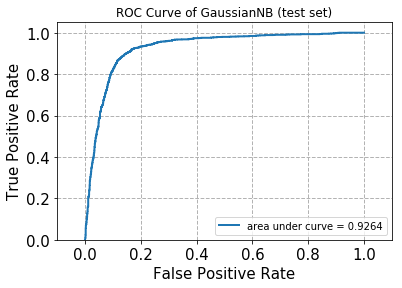

In [300]:
# ROC curve for test set
score_bayes = bayes.predict_proba(X_test_lsi)[:,1]
fpr_bayes, tpr_bayes, _ = metrics.roc_curve(test_label, score_bayes, pos_label=1)

plot_roc(fpr_bayes, tpr_bayes)
plt.title('ROC Curve of GaussianNB (test set)')

Text(0.5,1,'ROC Curve of GaussianNB (train set)')

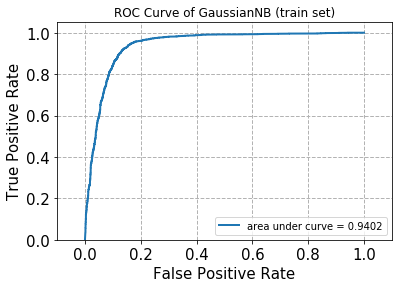

In [301]:
# ROC curve for train set
score_train_bayes = bayes.predict_proba(X_train_lsi)[:,1]
fpr_train_bayes, tpr_train_bayes, _ = metrics.roc_curve(train_label, score_train_bayes, pos_label=1)

plot_roc(fpr_train_bayes, tpr_train_bayes)
plt.title('ROC Curve of GaussianNB (train set)')

In [303]:
# Evaluation
evaluate(bayes,'GaussianNB (train set)',X_train_lsi,train_label)

print()

_ = evaluate(bayes,'GaussianNB (test set)',X_test_lsi,test_label)

-------------------- Confusion Matrix of GaussianNB (train set) --------------------
[[2114  229]
 [ 393 1996]]
-------------------- Other Evaluation of GaussianNB (train set) --------------------
Accuracy: 0.8685545224006762
Recall: 0.8354960234407702
Precision: 0.8970786516853932
F-1 Score: 0.8651928912006935

-------------------- Confusion Matrix of GaussianNB (test set) --------------------
[[1419  141]
 [ 332 1258]]
-------------------- Other Evaluation of GaussianNB (test set) --------------------
Accuracy: 0.8498412698412698
Recall: 0.7911949685534592
Precision: 0.8992137240886348
F-1 Score: 0.8417530946804951


## Question 7:
Grid search of parameters:
- Construct a Pipeline that performs feature extraction,, dimensionality reduction and classification;
- Do grid search with 5-fold cross-validation to compare the following (use test accuracy as the score to compare);
- What is the best combination?

In [ ]:
# prepare for pipeline

from sklearn.pipeline import Pipeline
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn


def tag_trans(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return 'n'

class IntelliTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, doc):
        self.new_wordlist = []
        self.old_wordlist = [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
        
        for word in self.old_wordlist:
            tag = pos_tag(word_tokenize(word))[0][1]
            pos = tag_trans(tag)
            new_word = self.wnl.lemmatize(word,pos)
            self.new_wordlist.append(new_word)
  
        return self.new_wordlist

vec = CountVectorizer(min_df=3,
                token_pattern=r'(?u)\b[a-zA-Z]{2,}\b',
                stop_words='english',
                tokenizer=IntelliTokenizer())     

X_train = vec.fit_transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vec.get_feature_names()))
print('-' * 20)
print(vec.get_feature_names())